In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
dataset = pd.read_csv("polynomial_logistic_data.csv")
dataset.head()

,data1,data2,output
0,0.1,0.2,1
1,-0.3,0.4,1
2,0.5,-0.1,1
3,-0.4,-0.3,1
4,0.2,0.6,1


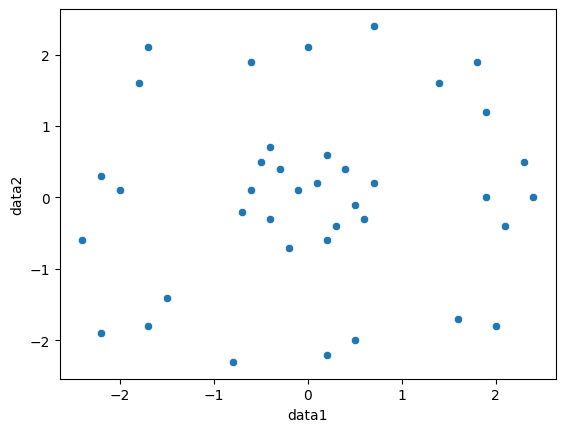

In [8]:
sns.scatterplot(x="data1", y="data2", data=dataset)
plt.show()

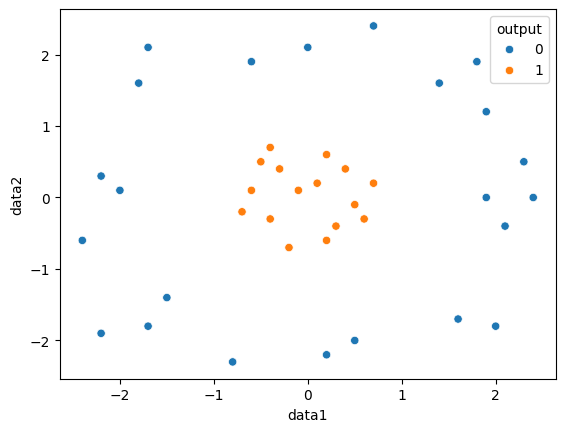

In [9]:
sns.scatterplot(x="data1", y="data2", data=dataset, hue="output")
plt.show()

This dataset is NOT linearly separable.

In [11]:
x = dataset.iloc[:,:-1]
y = dataset["output"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
lr.score(x_test, y_test)*100 # 62.5% accuracy

62.5

In [18]:
from mlxtend.plotting import plot_decision_regions

C:\Users\shali\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


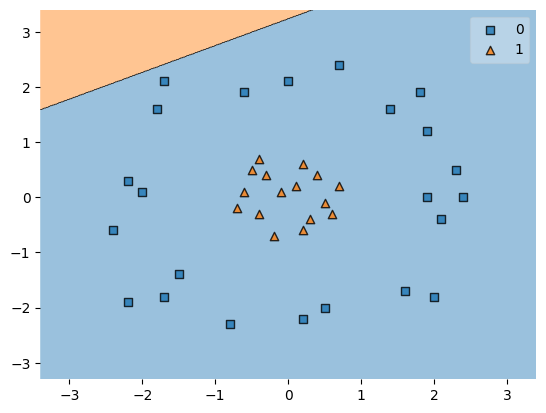

In [19]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=lr)
plt.show()

This dataset is not linearly separable.

A polynomial (non-linear) decision boundary is required to correctly classify the data.

**NOW APPLYING POLYNOMIAL FEATURE**

Polynomial features are applied after dividing the dataset into x and y using iloc to handle non-linear separation. 

**after this**  

**x = dataset.iloc[:,:-1]**

**y = dataset["output"]**

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
pf = PolynomialFeatures(degree=2)
pf.fit(x)
pf.transform(x)


array([[ 1.  ,  0.1 ,  0.2 ,  0.01,  0.02,  0.04],
       [ 1.  , -0.3 ,  0.4 ,  0.09, -0.12,  0.16],
       [ 1.  ,  0.5 , -0.1 ,  0.25, -0.05,  0.01],
       [ 1.  , -0.4 , -0.3 ,  0.16,  0.12,  0.09],
       [ 1.  ,  0.2 ,  0.6 ,  0.04,  0.12,  0.36],
       [ 1.  , -0.6 ,  0.1 ,  0.36, -0.06,  0.01],
       [ 1.  ,  0.7 ,  0.2 ,  0.49,  0.14,  0.04],
       [ 1.  , -0.2 , -0.7 ,  0.04,  0.14,  0.49],
       [ 1.  ,  0.3 , -0.4 ,  0.09, -0.12,  0.16],
       [ 1.  , -0.5 ,  0.5 ,  0.25, -0.25,  0.25],
       [ 1.  ,  0.4 ,  0.4 ,  0.16,  0.16,  0.16],
       [ 1.  , -0.1 ,  0.1 ,  0.01, -0.01,  0.01],
       [ 1.  ,  0.6 , -0.3 ,  0.36, -0.18,  0.09],
       [ 1.  , -0.7 , -0.2 ,  0.49,  0.14,  0.04],
       [ 1.  ,  0.2 , -0.6 ,  0.04, -0.12,  0.36],
       [ 1.  , -0.4 ,  0.7 ,  0.16, -0.28,  0.49],
       [ 1.  ,  1.8 ,  1.9 ,  3.24,  3.42,  3.61],
       [ 1.  , -1.7 ,  2.1 ,  2.89, -3.57,  4.41],
       [ 1.  ,  2.  , -1.8 ,  4.  , -3.6 ,  3.24],
       [ 1.  , -2.2 , -1.9 ,  4

In [31]:
pf = PolynomialFeatures(degree=3)
pf.fit(x)
x = pd.DataFrame(pf.transform(x))


In [32]:
x

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,1.0,1.0,0.1,0.2,0.01,0.02,0.04,1.0,0.1,0.2,...,0.000001,0.000002,0.000004,0.000004,0.000008,0.000016,0.000008,0.000016,0.000032,0.000064
1,1.0,1.0,-0.3,0.4,0.09,-0.12,0.16,1.0,-0.3,0.4,...,0.000729,-0.000972,0.001296,0.001296,-0.001728,0.002304,-0.001728,0.002304,-0.003072,0.004096
2,1.0,1.0,0.5,-0.1,0.25,-0.05,0.01,1.0,0.5,-0.1,...,0.015625,-0.003125,0.000625,0.000625,-0.000125,0.000025,-0.000125,0.000025,-0.000005,0.000001
3,1.0,1.0,-0.4,-0.3,0.16,0.12,0.09,1.0,-0.4,-0.3,...,0.004096,0.003072,0.002304,0.002304,0.001728,0.001296,0.001728,0.001296,0.000972,0.000729
4,1.0,1.0,0.2,0.6,0.04,0.12,0.36,1.0,0.2,0.6,...,0.000064,0.000192,0.000576,0.000576,0.001728,0.005184,0.001728,0.005184,0.015552,0.046656
5,1.0,1.0,-0.6,0.1,0.36,-0.06,0.01,1.0,-0.6,0.1,...,0.046656,-0.007776,0.001296,0.001296,-0.000216,0.000036,-0.000216,0.000036,-0.000006,0.000001
6,1.0,1.0,0.7,0.2,0.49,0.14,0.04,1.0,0.7,0.2,...,0.117649,0.033614,0.009604,0.009604,0.002744,0.000784,0.002744,0.000784,0.000224,0.000064
7,1.0,1.0,-0.2,-0.7,0.04,0.14,0.49,1.0,-0.2,-0.7,...,0.000064,0.000224,0.000784,0.000784,0.002744,0.009604,0.002744,0.009604,0.033614,0.117649
8,1.0,1.0,0.3,-0.4,0.09,-0.12,0.16,1.0,0.3,-0.4,...,0.000729,-0.000972,0.001296,0.001296,-0.001728,0.002304,-0.001728,0.002304,-0.003072,0.004096
9,1.0,1.0,-0.5,0.5,0.25,-0.25,0.25,1.0,-0.5,0.5,...,0.015625,-0.015625,0.015625,0.015625,-0.015625,0.015625,-0.015625,0.015625,-0.015625,0.015625


In [30]:
x.shape

(39, 6)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [ ]:
lr.score(x_test, y_test)*100 # when we make degree=3 it gives 100% accuracy

100.0

Decision Boundary Limitation

After applying Polynomial Features, the dataset is transformed into 6 features.
Since decision boundary visualization is only possible in 2D feature space, it is not feasible to plot the decision boundary for this transformed data.